In [1]:
import pandas as pd
import xgboost as xgb

df = pd.DataFrame(
    [[1, 2, 0], [3, 4, 1], [5, 6, 0], [7, 8, 1]],
    columns=["num", "amount", "target"]
)
df_xgb = xgb.DMatrix(
    df[["num", "amount"]], label=df["target"]
)
params = {"eval_metric": "logloss", "objective": "binary:hinge"}
bst = xgb.train(params, df_xgb)

bst.predict(df_xgb)

array([0., 1., 0., 1.], dtype=float32)

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xbg

XGBoost Classifier

In [3]:
# load in the wine dataset

wine = datasets.load_wine()

In [4]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine['data'], columns=wine['feature_names'])

# Include the target as well
df['target'] = wine['target']

In [5]:
# split data with these ratios: train 0.8 | test: 0.2

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [6]:
# load train/test datasets into DMatrix

dtrain = xgb.DMatrix(df_train.loc[:, df_train.columns != 'target'], label = df_train['target'])

dtest = xgb.DMatrix(df_test.loc[:, df_test.columns != 'target'], label = df_test['target'])

How does the model perform on the training dataset and with the default model parameters?

Using the hyperparameters in the requirements, is there improvement?

The test dataset is being used to score the model

In [7]:
param = {'max_depth':5, 'eta': 0.1, 'objetive':'multi:softmax', 'num_class': 3}

num_round = 100

bst = xgb.train(param, dtrain, num_round)

[10:01:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [8]:
# xgboost is not scikitleran, it is necessary to do predictions using its own API

preds = bst.predict(dtest)

In [9]:
# accuracyh score using scikit learn function for classification metric

accuracy_score(df_test['target'], preds)

0.9444444444444444

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

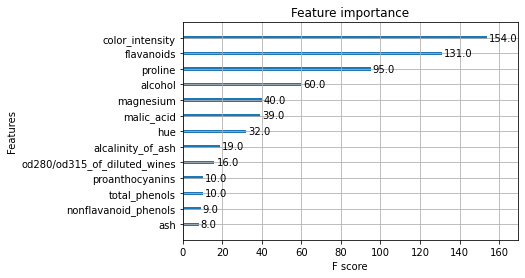

In [10]:
# plot the importance of the features based on fitted trees

xgb.plot_importance(bst)

XGBoost Regression

In [11]:
# load the diabetes dataset

diabetes = datasets.load_diabetes()

In [13]:
# create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
df_diabetes = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])

# include the target as well
df_diabetes['target'] = diabetes['target']

In [14]:
# split data with these ratios: train: 0.8 | test: 0.2

df_diabetes_train, df_diabetes_test = train_test_split(df_diabetes, test_size=0.2, random_state=0)

In [20]:
# load train/test dataframe into DMatrix

dtrain = xgb.DMatrix(df_diabetes_train.loc[:, df_diabetes_train.columns != 'target'], label=df_diabetes_train['target'])

dtest = xgb.DMatrix(df_diabetes_test.loc[:, df_diabetes_test.columns != 'target'], label=df_diabetes_test['target'])

How does the model perform on the training dataset and default parameters?

Using the hyperparameters in the requirements, is there improvement?

The test dataset is being used to score the model

In [21]:
param = {
    'max_depth': 2,
    'eta': 0.03,
    'gamma': 0.09,
    'colsample_bytree': 0.05,
    'objective': 'reg:squarederror'
}

num_round = 100

bst = xgb.train(param, dtrain, num_round)

In [23]:
# xgboost is not scikit learn, so it is necessary to do predictions using its own API

preds = bst.predict(dtest)

In [24]:
# R2 score using scikit learn function for regression metric

r2_score(df_diabetes_test['target'], preds)

0.27417256479119

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

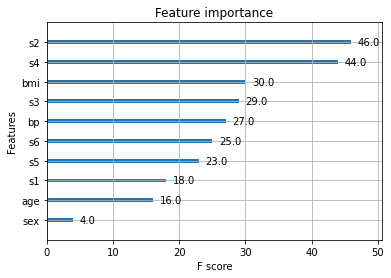

In [25]:
# plot the importance of the features based on fitted trees

xgb.plot_importance(bst)